<h1> Important imports </h1>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 #opencv library
import glob
import matplotlib.pyplot as plt  #plotting library
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow
import random
from keras.callbacks import EarlyStopping
from PIL import Image
import h5py
import os
print(os.listdir("../input"))

['state-farm-distracted-driver-detection']


Using TensorFlow backend.


<h1> Setting directory paths </h1>

In [2]:
directory = '../input/state-farm-distracted-driver-detection/train'
test_directory = '../input/state-farm-distracted-driver-detection/test/'
random_test = '../input/driver/'
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

<h1> Create training / test data </h1>

In [3]:
training_data = []
testing_data = []

In [4]:
def create_training_data():
    for category in classes:
        path = os.path.join(directory,category)
        class_num = classes.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img_array,(240,240))
            training_data.append([
                new_img,class_num])

In [5]:
def create_testing_data():        
    for img in os.listdir(test_directory):
        img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img_array,(240,240))
        testing_data.append([img,
            new_img])

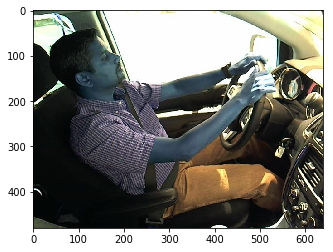

In [6]:
for i in classes:
    path = os.path.join(directory,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [7]:
create_training_data()
create_testing_data()

<h1> Shuffling data </h1>

In [8]:
random.shuffle(training_data)
x = []
y = []
for features, label in training_data:
    x.append(features)
    y.append(label)

In [9]:
x[0].shape

(240, 240)

In [10]:
y[0:20]

[7, 7, 6, 4, 3, 1, 3, 7, 8, 3, 3, 4, 8, 3, 4, 7, 7, 8, 1, 7]

<h2> Creating dummies for target </h2>

In [11]:
from keras.utils import np_utils
y_cat = np_utils.to_categorical(y,num_classes=10)

In [12]:
y_cat[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

 <h3> Reshaping the image to fit the batch size (batch count,h,w,c)</h3>

In [13]:
X = np.array(x).reshape(-1,240,240,1)
X[0].shape

(240, 240, 1)

In [14]:
X.shape

(22424, 240, 240, 1)

<h1> Split into Train/test sets using train_test_split</h1>

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y_cat,test_size=0.3,random_state=50)


In [16]:
print("Shape of train images is:", X_train.shape)
print("Shape of validation images is:", X_test.shape)
print("Shape of labels is:", y_train.shape)
print("Shape of labels is:", y_test.shape)

Shape of train images is: (15696, 240, 240, 1)
Shape of validation images is: (6728, 240, 240, 1)
Shape of labels is: (15696, 10)
Shape of labels is: (6728, 10)


<h1> Creating model architecture </h1>

In [17]:
batch_size = 128
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization

In [18]:
model = models.Sequential()

## CNN 1
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(240,240,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.2))

## CNN 2
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))

## CNN 3
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))

## CNN 3
#model.add(Conv2D(256,(5,5),activation='relu',padding='same'))
#model.add(BatchNormalization(axis = 3))
#model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
#model.add(Dropout(0.5))

## Dense & Output
model.add(Flatten())
model.add(Dense(units = 512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 238, 238, 32)      320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 238, 238, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 238, 238, 32)      9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 238, 238, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 119, 119, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 119, 119, 64)      18496     
__________

<h2> Compile and fit model </h2>

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
callbacks = [EarlyStopping(monitor='val_acc',patience=5)]

In [22]:
results = model.fit(X_train,y_train,batch_size=batch_size,epochs=12,verbose=1,validation_data=(X_test,y_test),callbacks=callbacks)

Train on 15696 samples, validate on 6728 samples
Epoch 1/12
15696/15696 [==============================] - 77s 5ms/step - loss: 1.3629 - acc: 0.5827 - val_loss: 0.1267 - val_acc: 0.9677
Epoch 2/12
15696/15696 [==============================] - 66s 4ms/step - loss: 0.2076 - acc: 0.9360 - val_loss: 0.0433 - val_acc: 0.9889
Epoch 3/12
15696/15696 [==============================] - 66s 4ms/step - loss: 0.0967 - acc: 0.9705 - val_loss: 0.0346 - val_acc: 0.9893
Epoch 4/12
15696/15696 [==============================] - 66s 4ms/step - loss: 0.0564 - acc: 0.9838 - val_loss: 0.0201 - val_acc: 0.9930
Epoch 5/12
15696/15696 [==============================] - 66s 4ms/step - loss: 0.0605 - acc: 0.9809 - val_loss: 0.0354 - val_acc: 0.9887
Epoch 6/12
15696/15696 [==============================] - 66s 4ms/step - loss: 0.0417 - acc: 0.9863 - val_loss: 0.0147 - val_acc: 0.9955
Epoch 7/12
15696/15696 [==============================] - 66s 4ms/step - loss: 0.0332 - acc: 0.9889 - val_loss: 0.0182 - val_acc:

In [23]:
test_img = np.array(testing_data[1][1]).reshape(-1,240,240,1)

In [24]:
preds = model.predict(test_img)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]


In [25]:
class_idx

5

In [26]:
#model.save('Project13.h5')

In [27]:
#model_json = model.to_json()
#with open("C:\\Users\\sidsu\\Desktop\\Algorithms\\model1.json", "w") as json_file:
#    json_file.write(model_json)

<h1> Save Model and weights</h1>

In [28]:
# serialize model to JSON
model_json = model.to_json()
with open("Modelarc.json", "w") as json_file:
    json_file.write(model_json)

In [29]:
model.save_weights("Modelweigh.h5")